<a href="https://colab.research.google.com/github/RhayzaPinto/Projeto_Modulo-IV/blob/sartorio/Projeto_M%C3%B3dulo_4_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import pandas as pd #para ler, visualizar e printar infos do DataFrame
import numpy as np #numpy porque é sempre bom importar numpy né

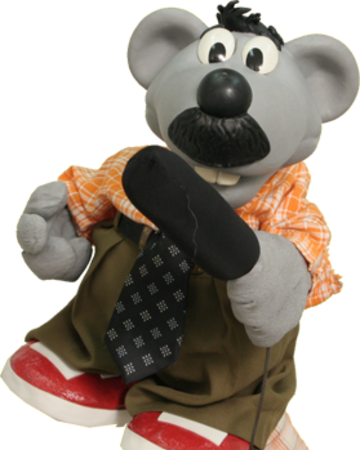

## Análise de Dados do mês de Junho de 2021

### Importando nossos dados diretamente da URL

In [25]:
link = 'https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/dsan/2021/2021-06-gasolina-etanol.csv'
dados_jun = pd.read_csv(link,sep=';')

### Realizando a limpeza dos dados

In [26]:
dados_jun

,Região - Sigla,Estado - Sigla,Município,Revenda,CNPJ da Revenda,Nome da Rua,Número Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,N,AC,CRUZEIRO DO SUL,CARDINAL E OLIVEIRA LTDA,03.608.766/0005-75,AVENIDA BOULEVARD THAUMATURGO,1031,NaN,CENTRO,69980-000,GASOLINA,02/06/2021,"6,89",NaN,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
1,N,AC,CRUZEIRO DO SUL,CARDINAL E OLIVEIRA LTDA,03.608.766/0005-75,AVENIDA BOULEVARD THAUMATURGO,1031,NaN,CENTRO,69980-000,GASOLINA ADITIVADA,02/06/2021,"6,89",NaN,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
2,N,AC,CRUZEIRO DO SUL,CARDINAL E OLIVEIRA LTDA,03.608.766/0006-56,AVENIDA 25 DE AGOSTO,1350,NaN,25 DE AGOSTO,69980-000,ETANOL,01/06/2021,"6,1",NaN,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
3,N,AC,CRUZEIRO DO SUL,CARDINAL E OLIVEIRA LTDA,03.608.766/0006-56,AVENIDA 25 DE AGOSTO,1350,NaN,25 DE AGOSTO,69980-000,GASOLINA,01/06/2021,"6,89",NaN,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
4,N,AC,CRUZEIRO DO SUL,CARDINAL E OLIVEIRA LTDA,03.608.766/0004-94,AVENIDA LAURO MULLER,943,NaN,JOÃO ALVES,69980-000,GASOLINA,02/06/2021,"6,89",NaN,R$ / litro,BRANCA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49732,NE,PE,VITORIA DE SANTO ANTAO,OLIVEIRA E SILVA POSTOS LTDA,35.228.711/0001-00,AVENIDA HENRIQUE DE HOLANDA,S/N,ANEXO 01,REDENCAO,55612-025,GASOLINA,27/06/2021,"5,59",NaN,R$ / litro,BRANCA
49733,NE,PE,VITORIA DE SANTO ANTAO,OLIVEIRA E SILVA POSTOS LTDA,35.228.711/0001-00,AVENIDA HENRIQUE DE HOLANDA,S/N,ANEXO 01,REDENCAO,55612-025,ETANOL,27/06/2021,"4,72",NaN,R$ / litro,BRANCA
49734,SE,ES,ARACRUZ,POSTO DE COMBUSTIVEL SHOW EIRELI,23.797.660/0001-40,AVENIDA CORONEL VENANCIO FLORES,28,NaN,CENTRO,29190-010,GASOLINA,28/06/2021,"5,67",NaN,R$ / litro,BRANCA
49735,SE,ES,ARACRUZ,POSTO DE COMBUSTIVEL SHOW EIRELI,23.797.660/0001-40,AVENIDA CORONEL VENANCIO FLORES,28,NaN,CENTRO,29190-010,ETANOL,28/06/2021,"4,79",NaN,R$ / litro,BRANCA


In [27]:
pd.set_option("display.max_rows", 999)

In [28]:
# Verificando se existem dados inexistentes (NaN)
dados_jun.isna().sum()

Região - Sigla           0
Estado - Sigla           0
Município                0
Revenda                  0
CNPJ da Revenda          0
Nome da Rua              0
Número Rua              23
Complemento          39685
Bairro                 124
Cep                      0
Produto                  0
Data da Coleta           0
Valor de Venda           0
Valor de Compra      49737
Unidade de Medida        0
Bandeira                 0
dtype: int64

In [29]:
# Deletando a coluna "Valor de Compra", pois nessa coluna inexistem informações.
del dados_jun['Valor de Compra']

In [30]:
# Fazendo a substituição dos valores nulos ( NaN ) pela string "Sem Complemento"
dados_jun = dados_jun.fillna("Sem Complemento")

In [31]:
# Substituindo todos os "Sem Complemento" na coluna Bairro pela string "N/A"
dados_jun['Bairro'] = dados_jun['Bairro'].replace(['Sem Complemento'],'N/A')

In [32]:
# Removendo valores duplicados nas linhas
dados_jun.duplicated()
dados_jun.drop_duplicates()

,Região - Sigla,Estado - Sigla,Município,Revenda,CNPJ da Revenda,Nome da Rua,Número Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Unidade de Medida,Bandeira
0,N,AC,CRUZEIRO DO SUL,CARDINAL E OLIVEIRA LTDA,03.608.766/0005-75,AVENIDA BOULEVARD THAUMATURGO,1031,Sem Complemento,CENTRO,69980-000,GASOLINA,02/06/2021,"6,89",R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
1,N,AC,CRUZEIRO DO SUL,CARDINAL E OLIVEIRA LTDA,03.608.766/0005-75,AVENIDA BOULEVARD THAUMATURGO,1031,Sem Complemento,CENTRO,69980-000,GASOLINA ADITIVADA,02/06/2021,"6,89",R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
2,N,AC,CRUZEIRO DO SUL,CARDINAL E OLIVEIRA LTDA,03.608.766/0006-56,AVENIDA 25 DE AGOSTO,1350,Sem Complemento,25 DE AGOSTO,69980-000,ETANOL,01/06/2021,"6,1",R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
3,N,AC,CRUZEIRO DO SUL,CARDINAL E OLIVEIRA LTDA,03.608.766/0006-56,AVENIDA 25 DE AGOSTO,1350,Sem Complemento,25 DE AGOSTO,69980-000,GASOLINA,01/06/2021,"6,89",R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
4,N,AC,CRUZEIRO DO SUL,CARDINAL E OLIVEIRA LTDA,03.608.766/0004-94,AVENIDA LAURO MULLER,943,Sem Complemento,JOÃO ALVES,69980-000,GASOLINA,02/06/2021,"6,89",R$ / litro,BRANCA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49732,NE,PE,VITORIA DE SANTO ANTAO,OLIVEIRA E SILVA POSTOS LTDA,35.228.711/0001-00,AVENIDA HENRIQUE DE HOLANDA,S/N,ANEXO 01,REDENCAO,55612-025,GASOLINA,27/06/2021,"5,59",R$ / litro,BRANCA
49733,NE,PE,VITORIA DE SANTO ANTAO,OLIVEIRA E SILVA POSTOS LTDA,35.228.711/0001-00,AVENIDA HENRIQUE DE HOLANDA,S/N,ANEXO 01,REDENCAO,55612-025,ETANOL,27/06/2021,"4,72",R$ / litro,BRANCA
49734,SE,ES,ARACRUZ,POSTO DE COMBUSTIVEL SHOW EIRELI,23.797.660/0001-40,AVENIDA CORONEL VENANCIO FLORES,28,Sem Complemento,CENTRO,29190-010,GASOLINA,28/06/2021,"5,67",R$ / litro,BRANCA
49735,SE,ES,ARACRUZ,POSTO DE COMBUSTIVEL SHOW EIRELI,23.797.660/0001-40,AVENIDA CORONEL VENANCIO FLORES,28,Sem Complemento,CENTRO,29190-010,ETANOL,28/06/2021,"4,79",R$ / litro,BRANCA


In [38]:
dados_jun.rename(columns={'Região - Sigla': '  Região  '}, inplace = True)
dados_jun.rename(columns={'Estado - Sigla': '  Estado  '}, inplace = True)
dados_jun.rename(columns={'Município': '   Município   '}, inplace = True)
dados_jun.rename(columns={'Revenda': 'Revenda'}, inplace = True)
dados_jun.rename(columns={'CNPJ da Revenda': '  CNPJ   '}, inplace = True)
dados_jun.rename(columns={'Nome da Rua': 'Nome da Rua'}, inplace = True)
dados_jun.rename(columns={'Número Rua': '   Número   '}, inplace = True)
dados_jun.rename(columns={'Complemento': '  Complemento   '}, inplace = True)
dados_jun.rename(columns={'Bairro': '  Bairro   '}, inplace = True)
dados_jun.rename(columns={'Cep': '  CEP   '}, inplace = True)
dados_jun.rename(columns={'Valor de Venda': '  Valor de Venda   '}, inplace = True)
dados_jun.rename(columns={'Unidade de Medida': '  Unidade de Medida   '}, inplace = True)
dados_jun.rename(columns={'Bandeira': '  Bandeira   '}, inplace = True)

In [39]:
dados_jun.style.set_properties(subset=['Nome da Rua'], **{'width': '300px'})

KeyError: "None of [Index(['Nome da Rua'], dtype='object')] are in the [columns]"

In [ ]:
# Última verificação para integridade dos dados.
dados_jun

,Região,Estado,Município,Revenda,CNPJ,Nome da Rua,Número,Complemento,Bairro,CEP,Produto,Data da Coleta,Valor de Venda,Unidade de Medida,Bandeira
0,N,AC,CRUZEIRO DO SUL,CARDINAL E OLIVEIRA LTDA,03.608.766/0005-75,AVENIDA BOULEVARD THAUMATURGO,1031,Sem Complemento,CENTRO,69980-000,GASOLINA,02/06/2021,"6,89",R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
1,N,AC,CRUZEIRO DO SUL,CARDINAL E OLIVEIRA LTDA,03.608.766/0005-75,AVENIDA BOULEVARD THAUMATURGO,1031,Sem Complemento,CENTRO,69980-000,GASOLINA ADITIVADA,02/06/2021,"6,89",R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
2,N,AC,CRUZEIRO DO SUL,CARDINAL E OLIVEIRA LTDA,03.608.766/0006-56,AVENIDA 25 DE AGOSTO,1350,Sem Complemento,25 DE AGOSTO,69980-000,ETANOL,01/06/2021,"6,1",R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
3,N,AC,CRUZEIRO DO SUL,CARDINAL E OLIVEIRA LTDA,03.608.766/0006-56,AVENIDA 25 DE AGOSTO,1350,Sem Complemento,25 DE AGOSTO,69980-000,GASOLINA,01/06/2021,"6,89",R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
4,N,AC,CRUZEIRO DO SUL,CARDINAL E OLIVEIRA LTDA,03.608.766/0004-94,AVENIDA LAURO MULLER,943,Sem Complemento,JOÃO ALVES,69980-000,GASOLINA,02/06/2021,"6,89",R$ / litro,BRANCA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49732,NE,PE,VITORIA DE SANTO ANTAO,OLIVEIRA E SILVA POSTOS LTDA,35.228.711/0001-00,AVENIDA HENRIQUE DE HOLANDA,S/N,ANEXO 01,REDENCAO,55612-025,GASOLINA,27/06/2021,"5,59",R$ / litro,BRANCA
49733,NE,PE,VITORIA DE SANTO ANTAO,OLIVEIRA E SILVA POSTOS LTDA,35.228.711/0001-00,AVENIDA HENRIQUE DE HOLANDA,S/N,ANEXO 01,REDENCAO,55612-025,ETANOL,27/06/2021,"4,72",R$ / litro,BRANCA
49734,SE,ES,ARACRUZ,POSTO DE COMBUSTIVEL SHOW EIRELI,23.797.660/0001-40,AVENIDA CORONEL VENANCIO FLORES,28,Sem Complemento,CENTRO,29190-010,GASOLINA,28/06/2021,"5,67",R$ / litro,BRANCA
49735,SE,ES,ARACRUZ,POSTO DE COMBUSTIVEL SHOW EIRELI,23.797.660/0001-40,AVENIDA CORONEL VENANCIO FLORES,28,Sem Complemento,CENTRO,29190-010,ETANOL,28/06/2021,"4,79",R$ / litro,BRANCA


## Análise dos Dados do mês de Julho de 2021

In [ ]:
link2 = 'https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/dsan/2021/2021-07-gasolina-etanol.csv'
dados_jul = pd.read_csv(link2,sep=';')
dados_jul

,Região - Sigla,Estado - Sigla,Município,Revenda,CNPJ da Revenda,Nome da Rua,Número Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,NE,CE,MARACANAU,BEZERRA & MENDES COMERCIAL DE PETRÓLEO LTDA.,05.397.086/0001-51,RODOVIA MARANGUAPE - FORTALEZA - KM 06,S/N,NaN,PARQUE LUZARDO VIANA,61910-000,GASOLINA,01/07/2021,"5,499",NaN,R$ / litro,IPIRANGA
1,NE,CE,MARACANAU,BEZERRA & MENDES COMERCIAL DE PETRÓLEO LTDA.,05.397.086/0001-51,RODOVIA MARANGUAPE - FORTALEZA - KM 06,S/N,NaN,PARQUE LUZARDO VIANA,61910-000,ETANOL,01/07/2021,"5,2",NaN,R$ / litro,IPIRANGA
2,NE,CE,MARACANAU,BEZERRA & MENDES COMERCIAL DE PETRÓLEO LTDA.,05.397.086/0001-51,RODOVIA MARANGUAPE - FORTALEZA - KM 06,S/N,NaN,PARQUE LUZARDO VIANA,61910-000,GASOLINA ADITIVADA,01/07/2021,"5,699",NaN,R$ / litro,IPIRANGA
3,NE,CE,MARACANAU,LUIZA GLAURIA R T MENEZES,03.602.329/0001-10,ESTRADA FORTALEZA MARANGUAPE,S/N,NaN,KAGADO,61901-410,GASOLINA,01/07/2021,"5,49",NaN,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
4,NE,CE,MARACANAU,LUIZA GLAURIA R T MENEZES,03.602.329/0001-10,ESTRADA FORTALEZA MARANGUAPE,S/N,NaN,KAGADO,61901-410,ETANOL,01/07/2021,"4,99",NaN,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47844,SE,ES,ARACRUZ,POSTO DE COMBUSTIVEL SHOW EIRELI,23.797.660/0001-40,AVENIDA CORONEL VENANCIO FLORES,28,NaN,CENTRO,29190-010,GASOLINA ADITIVADA,26/07/2021,"5,87",NaN,R$ / litro,BRANCA
47845,SE,ES,ARACRUZ,POSTO DE COMBUSTIVEL SHOW EIRELI,23.797.660/0001-40,AVENIDA CORONEL VENANCIO FLORES,28,NaN,CENTRO,29190-010,ETANOL,26/07/2021,"4,99",NaN,R$ / litro,BRANCA
47846,SE,ES,ARACRUZ,POSTO DE COMBUSTIVEL SHOW EIRELI,23.797.660/0001-40,AVENIDA CORONEL VENANCIO FLORES,28,NaN,CENTRO,29190-010,GASOLINA,26/07/2021,"5,87",NaN,R$ / litro,BRANCA
47847,SE,MG,ARAXA,AUTO POSTO BRANQUINHO LTDA,37.461.683/0001-94,AVENIDA SENADOR MONTANDON,950,NaN,CENTRO,38183-214,ETANOL,28/07/2021,"4,599",NaN,R$ / litro,RIO BRANCO
